# EDA (Exploratory Data Analysis)
The process of:
- Organizing 
- Plotting
- Summarizing

a dataset.

In [22]:
import pandas as pd

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [35]:
# DataFrame选取指定列，将列名作为列表
df = df_swing[['state', 'county', 'dem_share']]
df.head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


# 直方图
直方图主要用来反映一组样本数据的分布情况。从图的形式来看，它属于**柱状图**的一种，但它和柱状图相比还是有很多不同之处的：
- 直方图的任意两个 bar 之间不允许有间隙，这是因为原始样本值被分割成一系列连续的、相互邻接的小区间，每一个小区间都是左闭右开的，除了最后一个，如[x0, x1), [x1,x2), [x2,x3）；
- 在直方图中小区间又被称为“bin”。其中bin的高度是由落入该区间中样本值的个数决定的；

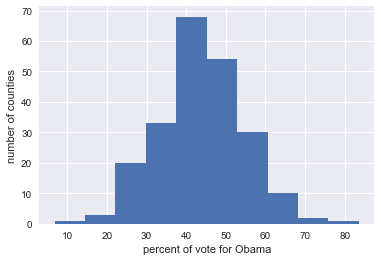

In [36]:
import matplotlib.pyplot as plt

# 将返回值保存到dummy变量‘_’中
_ = plt.hist(df['dem_share'])

# 最佳实践：永远永远永远对坐标轴进行标注
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

**bins** : integer or sequence or ‘auto’, optional

- If an integer is given, bins + 1 bin edges are calculated and returned, consistent with numpy.histogram().
- If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin. In this case, bins is returned unmodified.
- All but the last (righthand-most) bin is half-open. In other words, if bins is:
```
[1, 2, 3, 4]
```
then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

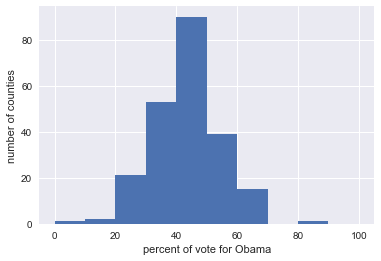

In [37]:
# binning
import matplotlib.pyplot as plt

# 指定区间
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 将返回值保存到dummy变量‘_’中
_ = plt.hist(df['dem_share'], bins=bin_edges)

# 最佳实践：永远永远永远对坐标轴进行标注
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

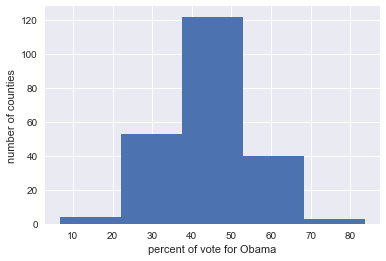

In [38]:
import matplotlib.pyplot as plt

# 将返回值保存到dummy变量‘_’中
# bins参数默认为10
# 将样本值划分为bins个区间，也即有bins+1个bin edges
_ = plt.hist(df['dem_share'], bins=5)

# 最佳实践：永远永远永远对坐标轴进行标注
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

# 练习1
读取鸢尾花(virginica亚属)的数据(iris.csv)，创建四个code block，将`sepal_length`、`sepal_width`、`petal_length`和`petal_width`数据通过直方图呈现。

参考代码：
```
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 读取数据
df = pd.read_csv('../data/iris.csv')

# sepal_length where species is virginica
virginica = df.loc[df['species'] == 'virginica']

# 获取sepal_length
sepal_length = virginica['sepal_length']

# 剩余代码请自行补齐
```

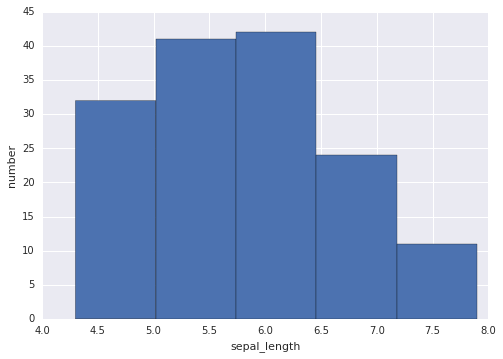

In [14]:
# sepal_length
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./notebooks/data/iris.csv')
plt.xlabel('sepal_length')
plt.ylabel('number')

plt.hist(df['sepal_length'], bins=5)
plt.show()


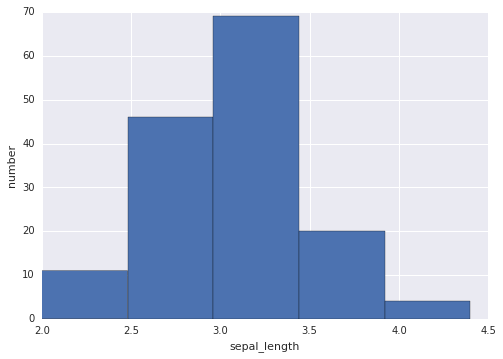

In [17]:
# sepal_width
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./notebooks/data/iris.csv')
plt.xlabel('sepal_length')
plt.ylabel('number')

plt.hist(df['sepal_width'], bins=5)
plt.show()

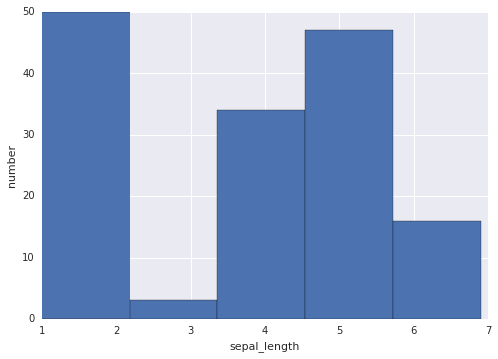

In [18]:
# petal_length
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./notebooks/data/iris.csv')
plt.xlabel('petal_length')
plt.ylabel('number')

plt.hist(df['petal_length'], bins=5)
plt.show()

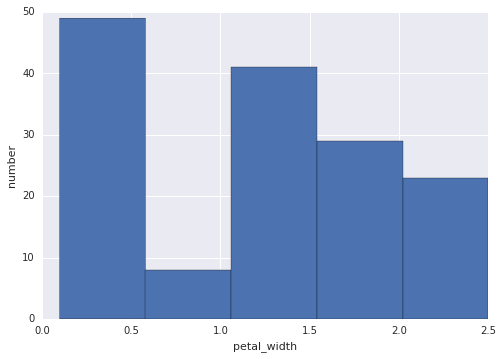

In [21]:
# petal_width
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./notebooks/data/iris.csv')
plt.xlabel('petal_width')
plt.ylabel('number')

plt.hist(df['petal_width'], bins=5)
plt.show()

# Subplots
improt pandas as pd
import matplotlib.pyplot as plt

df = plt.read_csv('./notebooks/data/iris.csv')

names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, ax = plt.subplots(nrows=2, ncols=2)
n=0
for row in ax:
    for col in row:
        bins = 5*(n+1)
        plt.xlabel(names[n])
        plt.ylabel('numes')
        plt.hist(df[names[n]], bins = bins)
        n += 1
plt.show()

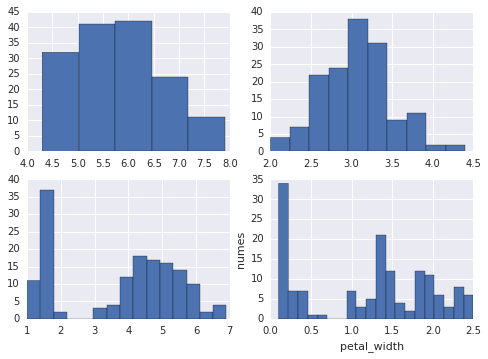

In [25]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('./notebooks/data/iris.csv') 

names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# df.head()
fig, ax = plt.subplots(nrows=2, ncols=2)

n = 0
for row in ax:
    for col in row:
        bins = 5*(n+1)
        _ = plt.xlabel(names[n])
        _ = plt.ylabel('numes')
        _ = col.hist(df[names[n]], bins=bins)
        n += 1

plt.show()

# Binning bias
**问题**: 
- bins参数的不同，对应的直方图也不一样，从而导致可能得出不同的解释；
- 直方图并没有显示所有的数据，而只是显示对应区间样本的数量(频次);

# Bee Swarm Plot
参考： http://resources.rhoworld.com/blog/resourcebrcenter/rhos-blog/i-swarm-you-swarm-we-all-swarm-for-beeswarm-plots-0

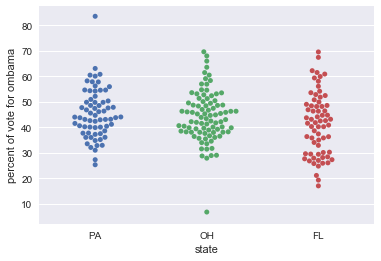

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for ombama')

plt.show()

# 练习2

读取iris数据，绘制bee swarm plot (x为`species`，y为`sepal_length`)。要求为坐标轴打上标签。

参考代码：
```
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 读取数据
df = pd.read_csv('../data/iris.csv')

# 剩余代码请自行补齐
```


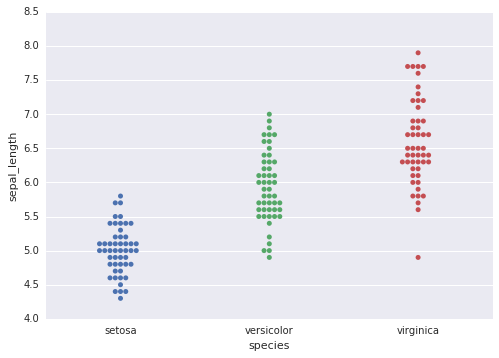

In [5]:
# 练习2代码......
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./notebooks/data/iris.csv')
_ = sns.swarmplot(x='species', y='sepal_length', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('sepal_length')
plt.show()

# ECDF (Empirical cumulative distribution functions)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

In [13]:
x = np.sort(df_swing['dem_share'])
n = len(x)
y = np.arange(1, n+1)/n
print(y)
print(x)

NameError: name 'df_swing' is not defined

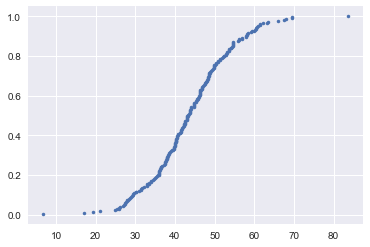

In [58]:
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('percent of vote for ombama')
plt.ylabel('ECDF')
plt.show()

# 练习3
- 创造一个`ecdf`函数，该函数原型：
```
def ecdf(data):
    """
    输入参数为样本数据，类型为列表
    返回值为绘制ecdf图所需要的x和y
    """
    
    # Number of data points: n
    n = _____
    
    # x-data for the ECDF: x
    x = _____
    
    # y-data for the ECDF: y
    y = _____
    
    return x, y
```
- 使用iris数据，绘制`virginica`类别的sepal_length数据的ECDF图，使用上面定义的`ecdf`函数。

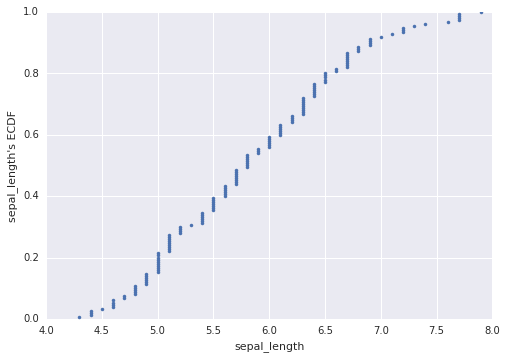

In [29]:
# 练习3代码
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def ecdf(data):
  x = np.sort(data)
  n = len(x)
  y = np.arange(1, n+1)/n
  return x, y



df = pd.read_csv('./notebooks/data/iris.csv')['sepal_length']
# print(df)
_ = plt.plot(ecdf(df)[0], ecdf(df)[1], marker='.', linestyle='none')
plt.xlabel('sepal_length')
plt.ylabel('sepal_length\'s ECDF')
plt.show()

# Box plot

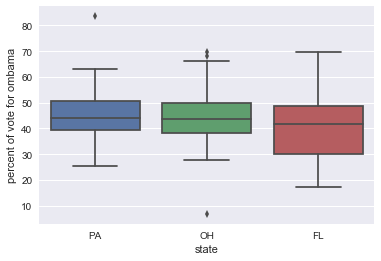

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

_ = sns.boxplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for ombama')

plt.show()

# 练习4
使用iris数据，绘制不同种类(`species`，共计3种)鸢尾花`sepal_length`的box plot。

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:450: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


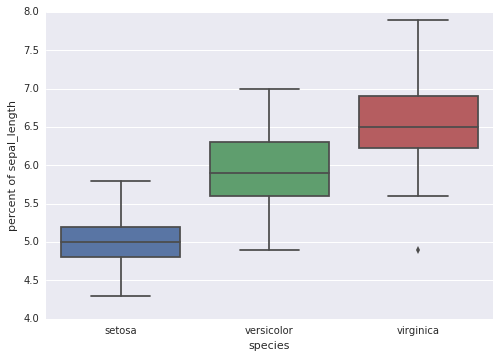

In [32]:
# 练习4代码

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./notebooks/data/iris.csv')
# print(df.info)
_ = sns.boxplot(x='species', y='sepal_length', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('percent of sepal_length') 
plt.show()

# Scatter Plot

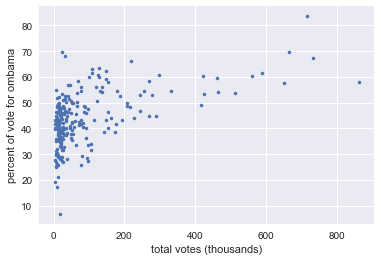

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

total_votes = df_swing['total_votes']
dem_share = df_swing['dem_share']
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for ombama')

plt.show()

# 练习5
从iris数据，获取`virginica`种类鸢尾花两个属性`petal_length`和`petal_width`的数据。使用Scatter plot绘制对这两组数据进行可视化。

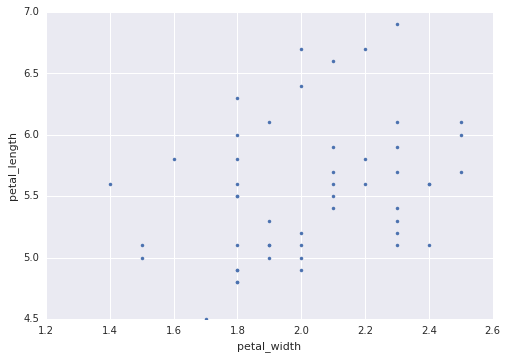

In [58]:
# 练习5代码

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取指定的列
df = pd.read_csv('./notebooks/data/iris.csv', usecols=['petal_length', 'petal_width', 'species'])
#筛选行
data = df[df['species']=='virginica']
_ = plt.plot(data['petal_width'], data['petal_length'], marker='.', linestyle='none')
_ = plt.xlabel('petal_width')
_ = plt.ylabel('petal_length')
plt.show()
